In [ ]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. 
# This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

In [ ]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. 
# All changes under this directory will be kept even after reset. 
# Please clean unnecessary files in time to speed up environment loading. 
!ls /home/aistudio/work

In [ ]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, 
# you need to use the persistence path as the following: 
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

In [ ]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可: 
# Also add the following code, 
# so that every time the environment (kernel) starts, 
# just run the following code: 
import sys 
sys.path.append('/home/aistudio/external-libraries')

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

In [1]:
import numpy as np
import json

In [2]:
def load_data():
    #load data
    datafile='data/data20831/housing.data'
    data=np.fromfile(datafile,sep=' ')

    #reshape data to N x 14
    feature_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATTO', 'B', 'LSTAT', 'MEDV']
    feature_num=len(feature_names)
    data=data.reshape([data.shape[0]//feature_num,feature_num])

    ratio=0.8
    offset=int(data.shape[0]*ratio)
    train_data=data[:offset]

    maxs,mins,avgs=\
                train_data.max(axis=0),\
                train_data.min(axis=0),\
                train_data.sum(axis=0)/train_data.shape[0]
    for i in range(feature_num):
        data[:,i]=((data[:,i]-mins[i])/(maxs[i]-mins[i]))
    
    train_data=data[:offset]
    test_data=data[offset:]
    return train_data,test_data

In [3]:
train_data,test_data=load_data()
x=train_data[: , :-1]
y=train_data[: , -1:]

In [4]:
print(x[0])
print(y[0])

[0.         0.18       0.07344184 0.         0.31481481 0.57750527
 0.64160659 0.26920314 0.         0.22755741 0.28723404 1.
 0.08967991]
[0.42222222]


In [5]:
w=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,-0.1,-0.2,-0.3,-0.4,0.0]
w=np.array(w).reshape([13,1])

In [6]:
x1=x[0]
t=np.dot(x1,w)
print(t)

[0.69474855]


In [7]:
b=-0.2
z=t+b
print(z)

[0.49474855]


In [115]:
class Network_1(object):
    def __init__(self,num_of_weights):
        np.random.seed(0)
        self.w=np.random.randn(num_of_weights,1)
        self.b=0
    
    def forward(self,x):
        z=np.dot(x,self.w)+self.b
        return z
    
    def loss(self,z,y):
        error=z-y
        cost=error*error
        cost=np.mean(cost)
        return cost
    
    def gradient(self,x,y):
        z=self.forward(x)
        gradient_w=(z-y)*x
        gradient_w=np.mean(gradient_w,axis=0)
        gradient_w=gradient_w[:,np.newaxis]
        gradient_b=(z-y)
        gradient_b=np.mean(gradient_b)
        return gradient_w,gradient_b

    def update(self,gradient_w,gradient_b,eta=0.01):
        self.w=self.w-eta*gradient_w
        self.b=self.b-eta*gradient_b
    
    def train(self,training_data,epoch_num,batch_size=10,eta=0.01):
        n=len(training_data)
        losses=[]
        pred=[]
        for epoch in range(epoch_num):
            np.random.shuffle(train_data)
            mini_batches=[train_data[k:k+batch_size] for k in range(0,n,batch_size)]
            for iters,mini_batch in enumerate(mini_batches):
                x=mini_batch[: , :-1]
                y=mini_batch[: , -1:]
                z=self.forward(x)
                z1=np.array(z).ravel()
                for i in range(len(z)):
                    pred.append(z1[i])
                loss=self.loss(z,y)
                losses.append(loss)
                gradient_w,gradient_b=self.gradient(x,y)
                self.update(gradient_w,gradient_b,eta)
                if iters%20==0:
                    print('Epoch :{:3d}/iter :{:3d}, loss :{:.4f}'.format(epoch,iters,loss))
        return losses,pred

Epoch :  0/iter :  0, loss :9.9465
Epoch :  0/iter : 20, loss :1.2113
Epoch :  0/iter : 40, loss :0.4067
Epoch :  1/iter :  0, loss :1.5504
Epoch :  1/iter : 20, loss :2.7872
Epoch :  1/iter : 40, loss :0.6358
Epoch :  2/iter :  0, loss :0.7143
Epoch :  2/iter : 20, loss :0.9426
Epoch :  2/iter : 40, loss :0.4592
Epoch :  3/iter :  0, loss :0.4681
Epoch :  3/iter : 20, loss :0.7051
Epoch :  3/iter : 40, loss :0.5950
Epoch :  4/iter :  0, loss :0.6511
Epoch :  4/iter : 20, loss :0.3511
Epoch :  4/iter : 40, loss :0.3139
Epoch :  5/iter :  0, loss :1.5604
Epoch :  5/iter : 20, loss :0.7767
Epoch :  5/iter : 40, loss :0.7213
Epoch :  6/iter :  0, loss :0.3565
Epoch :  6/iter : 20, loss :0.4771
Epoch :  6/iter : 40, loss :0.2559
Epoch :  7/iter :  0, loss :0.2704
Epoch :  7/iter : 20, loss :0.4516
Epoch :  7/iter : 40, loss :0.3085
Epoch :  8/iter :  0, loss :0.5189
Epoch :  8/iter : 20, loss :0.3165
Epoch :  8/iter : 40, loss :0.0903
Epoch :  9/iter :  0, loss :0.3110
Epoch :  9/iter : 20

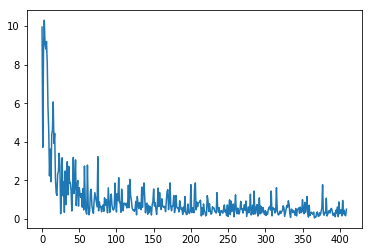

In [116]:
#train the net
import matplotlib.pyplot as plt
train_data,test_data=load_data()
net_1=Network_1(13)
losses_1,pred_1=net_1.train(train_data,epoch_num=10,batch_size=10,eta=0.01)
plot_x=np.arange(len(losses_1))
plot_y=np.array(losses_1)
plt.plot(plot_x,plot_y)
plt.show()

Use paddle

In [117]:
import paddle
from paddle.nn import Linear
import paddle.nn.functional as F
import numpy as np 
import os
import random

In [118]:
def load_data():
    #load data
    datafile='data/data20831/housing.data'
    data=np.fromfile(datafile,sep=' ',dtype=np.float32)

    #reshape data to N x 14
    feature_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATTO', 'B', 'LSTAT', 'MEDV']
    feature_num=len(feature_names)
    data=data.reshape([data.shape[0]//feature_num,feature_num])

    ratio=0.8
    offset=int(data.shape[0]*ratio)
    train_data=data[:offset]

    maxs,mins,avgs=\
                train_data.max(axis=0),\
                train_data.min(axis=0),\
                train_data.sum(axis=0)/train_data.shape[0]
    
    global max_values
    global min_values
    global avg_values
    max_values=maxs
    min_values=mins
    avg_values=avgs

    for i in range(feature_num):
        data[:,i]=((data[:,i]-mins[i])/(maxs[i]-mins[i]))
    
    train_data=data[:offset]
    test_data=data[offset:]
    return train_data,test_data

In [119]:
class Network_2(paddle.nn.Layer):
    def __init__(self):
        super(Network_2,self).__init__()
        #define a Linear layer
        self.fc=Linear(in_features=13,out_features=1)

    def forward(self,inputs):
        x=self.fc(inputs)
        return x

In [120]:
net_2=Network_2()
#start training
net_2.train()
#load data
train_data,test_data=load_data()
#use SGD to optimize
optim=paddle.optimizer.SGD(learning_rate=0.1,parameters=net_2.parameters())

In [121]:
EPOCH_NUM=10
BATCH_SIZE=10

losses_2=[]
pred_2=[]
for epoch in range(EPOCH_NUM):
    np.random.shuffle(train_data)
    mini_batches=[train_data[k:k+BATCH_SIZE] for k in range(0,len(train_data),BATCH_SIZE)] 
    for iters,mini_batch in enumerate(mini_batches):
        x=np.array(mini_batch[: , :-1])
        y=np.array(mini_batch[: , -1:])
        house_features=paddle.to_tensor(x)
        prices=paddle.to_tensor(y)
        #forward
        pred=net_2(house_features)
        pred1=np.array(pred).ravel()
        for i in range(len(pred1)):
            pred_2.append(pred1[i])
        #loss
        loss=F.square_error_cost(pred,label=prices)
        avg_loss=paddle.mean(loss)
        losses_2.append(avg_loss.numpy())
        if iters%20==0:
            print('epoch: {}, iter: {}, loss:{}'.format(epoch,iters,avg_loss.numpy()))
        #backward
        avg_loss.backward()
        #update
        optim.step()
        #clear gradient
        optim.clear_grad()

epoch: 0, iter: 0, loss:[2.1120412]
epoch: 0, iter: 20, loss:[0.04650052]
epoch: 0, iter: 40, loss:[0.01013636]
epoch: 1, iter: 0, loss:[0.06373022]
epoch: 1, iter: 20, loss:[0.03134491]
epoch: 1, iter: 40, loss:[0.03021228]
epoch: 2, iter: 0, loss:[0.01008978]
epoch: 2, iter: 20, loss:[0.023943]
epoch: 2, iter: 40, loss:[0.02007041]
epoch: 3, iter: 0, loss:[0.00575432]
epoch: 3, iter: 20, loss:[0.01285518]
epoch: 3, iter: 40, loss:[0.00878636]
epoch: 4, iter: 0, loss:[0.00604234]
epoch: 4, iter: 20, loss:[0.01382492]
epoch: 4, iter: 40, loss:[0.01202871]
epoch: 5, iter: 0, loss:[0.02356646]
epoch: 5, iter: 20, loss:[0.00463088]
epoch: 5, iter: 40, loss:[0.01744461]
epoch: 6, iter: 0, loss:[0.01669798]
epoch: 6, iter: 20, loss:[0.00188807]
epoch: 6, iter: 40, loss:[0.00216641]
epoch: 7, iter: 0, loss:[0.01199755]
epoch: 7, iter: 20, loss:[0.01740126]
epoch: 7, iter: 40, loss:[0.01329578]
epoch: 8, iter: 0, loss:[0.01861829]
epoch: 8, iter: 20, loss:[0.00532964]
epoch: 8, iter: 40, loss

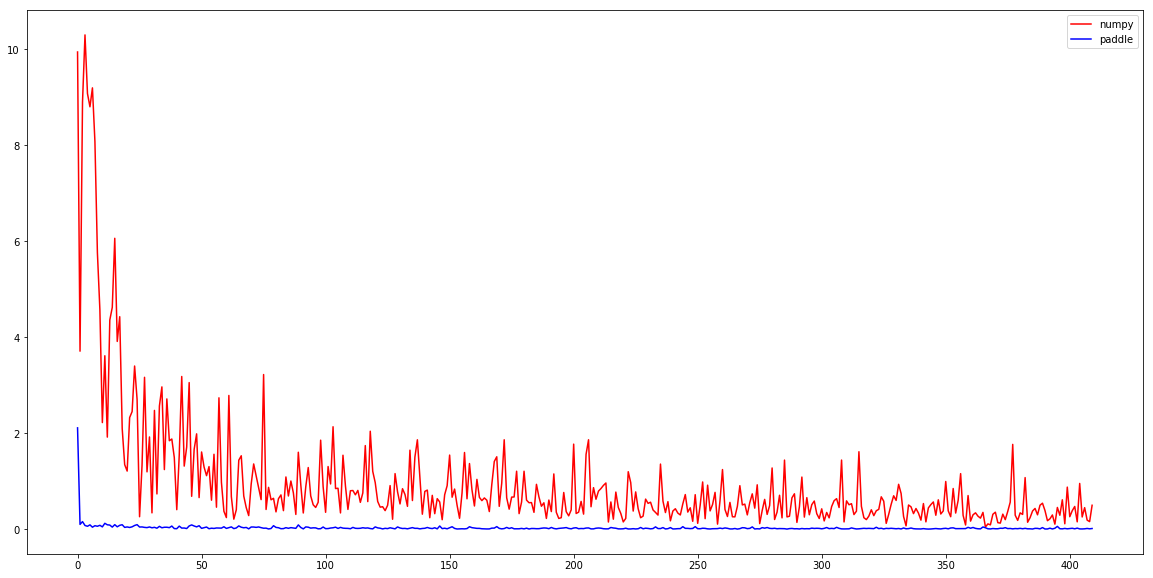

In [123]:
#compare the loss
plt.figure(figsize=(20,10))
plot_x_1=np.arange(len(losses_1))
plot_y_1=np.array(losses_1)
plt.plot(plot_x_1,plot_y_1,color='red',label='numpy')
plot_x_2=np.arange(len(losses_2))
plot_y_2=np.array(losses_2)
plt.plot(plot_x_2,plot_y_2,color='blue',label='paddle')
plt.legend()
plt.show()

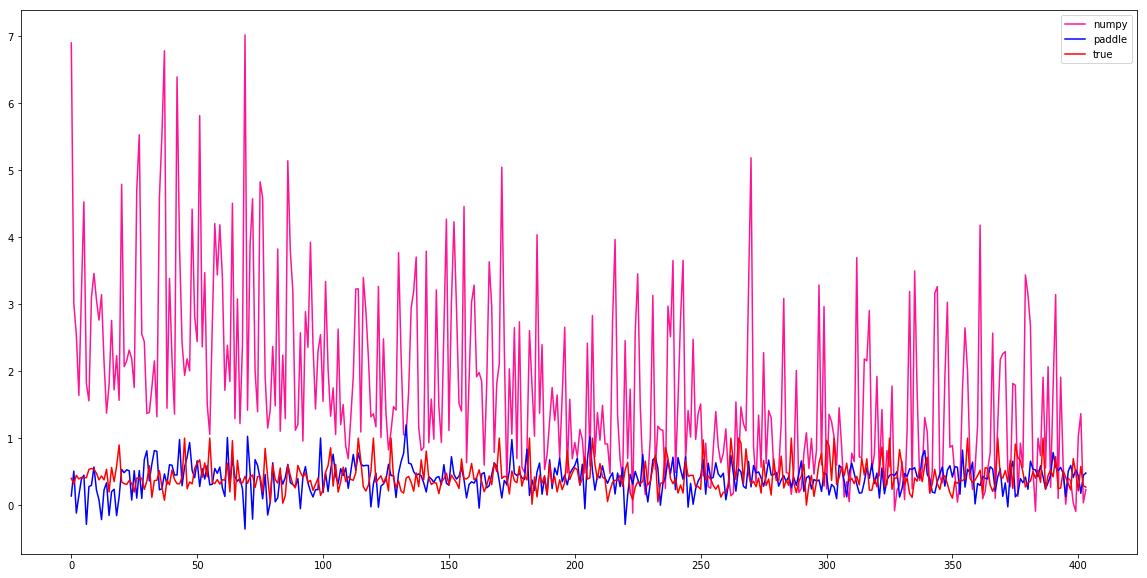

In [114]:
#compare the prediction
plt.figure(figsize=(20,10))
x=train_data[:, :-1]
y=train_data[:, -1:]
pred_1=pred_1[:404]
pred_2=pred_2[:404]
plot_x_3=np.arange(len(pred_1))
plot_y_3=np.array(pred_1)
plt.plot(plot_x_3,plot_y_3,color='deeppink',label='numpy')
plot_x_4=np.arange(len(pred_2))
plot_y_4=pred_2
plt.plot(plot_x_4,plot_y_4,color='blue',label='paddle')
plot_x_true=np.arange(len(y))
plot_y_true=np.array(y)
plt.plot(plot_x_true,plot_y_true,color='red',label='true')
plt.legend()
plt.show()